<a href="https://colab.research.google.com/github/jiiiisoo/Studying/blob/main/%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0/7.Tree_heap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***힙이란?***

힙은 완전 트리이다. 따라서 높이는 O(log_2(n)) 을 따른다. Heap의 중요한 특성 중 하나는 모든 노드의 데이터는 자식 노드의 데이터보다 크거나 같다. 따라서, 힙으로는 정렬과 우선 순위 큐를 구현할 수 있다.

정렬은 데이터를 순서대로 배치하는 것으로, 정렬 알고리즘은 데이터를 재배치하는 구체적 방법 중 하나이다. 종류에는 크게 삽입 정렬, 퀵 정렬, 선택 정렬, 합병 정렬이 있으며 이들을 힙 정렬이라고 한다.

***힙 구현하기***

힙도 완전 이진 트리이므로 리스트로 구현할 수 있고, 자식 노드를 찾을 때에도 완전 이진 트리에서 사용하는 방법과 동일하다. (왼쪽 자식=인덱스*2, 오른쪽 자식=인덱스*2+1)

In [ ]:
complete_binary_tree=[None,1,5,12,11,9,10,14,2,10] #None 넣는 이유: 파이썬 리스트는 0부터 시작하므로

def get_parent_index(complete_binary_tree, index):
    if index//2>len(complete_binary_tree)-1 or index//2==0:
        return None
    else:
        return index//2

def get_left_child_index(complete_binary_tree, index):
    if index*2>len(complete_binary_tree)-1:
        return None
    else:
        return index*2

def get_right_child_index(complete_binary_tree, index):
    if index*2+1>len(complete_binary_tree)-1:
        return None
    else:
        return index*2+1

***힙 만들기***

힙은 완전 이진 트리라는 형태 속성, 크기 순서대로 배치되어야 하는 힙 속성 두 가지가 충족되어야 한다. 이 때, 크기를 재배치하는 알고리즘을 heapify라고 한다. 최악의 경우, 크기 재배치 시 가장 마지막 노드까지 내려가서 확인해야 하므로 이 높이는 log_2(n)에 비례하므로, 시간 복잡도 또한 O(log_2(n))이다.

In [ ]:
##heapify 함수 구현

#index_1과 index_2의 자리 바꿔줌
def swap(tree, index_1, index_2):
    temp = tree[index_1]
    tree[index_1] = tree[index_2]
    tree[index_2] = temp

#heapify 함수
def heapify(tree, index, tree_size):
    # 왼쪽 자식 노드의 인덱스와 오른쪽 자식 노드의 인덱스를 계산
    left_child_index = 2 * index
    right_child_index = 2 * index + 1
    largest=index
    if 0<left_child_index<tree_size and tree[largest]<tree[left_child_index]:
        largest=left_child_index
    if 0<right_child_index<tree_size and tree[largest]<tree[right_child_index]:
        largest=right_child_index
    if largest!=index:
        swap(tree,index,largest)
        heapify(tree,largest,tree_size)


# 실행 코드
tree = [None, 15, 5, 12, 14, 9, 10, 6, 2, 11, 1]  # heapify하려고 하는 완전 이진 트리
heapify(tree, 2, len(tree))  # 노드 2에 heapify 호출
print(tree)

[None, 15, 14, 12, 11, 9, 10, 6, 2, 5, 1]


위의 heapify에서는 원하는 노드를 넣으면 재배치가 되도록 알고리즘을 만들었다. 이를 이용하여 맨 밑 노드부터 heapify를 호출하는 방법도 있다. 이 때의 시간 복잡도는, heapify 한 번 호출하는 데 O(lg(n))이 걸렸으므로 맨 밑부터 차례로 하나씩 호출하면 O(n(lg(n)))만큼이 걸림을 알 수 있다.



***힙 정렬***

힙 정렬은 heapify를 이용해서 할 수 있다.

힙을 이용한 정렬 알고리즘은 힙 만든다-> 루트와 맨 마지막 노드를 바꾼다-> 맨 마지막 노드를 없는 노드 취급한다-> 새로운 노드가 힙 속성을 만족시킬 수 있게 호출한다 를 이용하면 오름차순 정렬을 만들 수 있다. 내림차순 정렬의 경우는 힙 속성을 반대로 (자식노드가 부모노드보다 크도록) 알고리즘을 만든 뒤 위의 과정을 반복하면 된다.

In [ ]:
#오름차순 힙 정렬 알고리즘

def heapsort(tree):
    tree_size = len(tree)
    #힙 만듦
    for i in range(tree_size-1,0,-1): #맨 마지막 노드부터 하나씩 heapify
        heapify(tree,i,tree_size)
    for j in range(tree_size-1,0,-1): #맨 마지막 노드 없는 취급 하기 위해 -1로 사이즈 줄여나감
        swap(tree,1,j)
        heapify(tree,1,j)

# 실행 코드
data_to_sort = [None, 6, 1, 4, 7, 10, 3, 8, 5, 1, 5, 7, 4, 2, 1]
heapsort(data_to_sort)
print(data_to_sort)

[None, 1, 1, 1, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 10]


***힙 정렬 시간 복잡도***

리스트를 힙으로 바꾸는 것 : O(nlg(n))

root 노드와 마지막 노드 바꾸는 것 : O(1)

새로운 root 노드에 heapify : O(lg(n))

2,3단계 n번 반복 : O(n(lg(n)+1))=O(nlg(n))

따라서, 힙 정렬 시간 복잡도는 O(nlg(n)) 이다.

다른 정렬 알고리즘과 비교

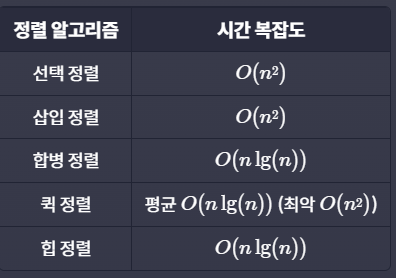

***우선순위 큐***

우선순위 큐는 추상 자료형으로 데이터를 저장할 수 있으며, 데이터가 크기 순서대로 나온다. 이는 고객들의 문의를 처리할 때 가장 많이 들어온 문의 처리 등에 쓸 수 있고, 힙을 이용하면 효율적으로 구현할 수 있다.

***힙에 데이터 삽입***

가장 마지막 인덱스에 데이터 추가 -> 삽입한 데이터와 부모 노드를 비교 -> 삽입한 데이터가 더 크다면 자리 교체 -> 2,3번을 삽입한 데이터가 맞는 자리 찾아갈 때까지 반복



***힙에서 root노드 데이터 추출***

root노드와 마지막 데이터 바꿈 -> 마지막 노드의 데이터를 변수에 저장 -> 마지막 노드 삭제 -> root 노드에 heapify 호출하여 망가진 heap 고침 -> 변수에 저장한 데이터 리턴

In [ ]:
#삽입노드와 부모노드 비교하여 삽입노드의 자리 찾아주는 함수
def reverse_heapify(tree, index):
    parent_index = index // 2  # 삽입된 노드의 부모 노드의 인덱스 계산
    if 0<parent_index<len(tree) and tree[index]>tree[parent_index]:
        swap(tree,index,parent_index)
        reverse_heapify(tree,parent_index)

#힙으로 구현한 우선순위 큐
class PriorityQueue:
    def __init__(self):
        self.heap = [None]  # 파이썬 리스트로 구현한 힙

    #데이터 삽입
    def insert(self, data):
        self.heap.append(data)
        dataindex=len(self.heap)-1
        reverse_heapify(self.heap,dataindex)

    #최우선순위 데이터 추출
    def extract_max(self):
        swap(self.heap,1,len(self.heap)-1)
        maxdata=self.heap.pop(len(self.heap)-1)
        heapify(self.heap,1,len(self.heap))
        return maxdata

    def __str__(self):
        return str(self.heap)


## 실행 코드
#삽입 메소드
priority_queue = PriorityQueue()

priority_queue.insert(6)
priority_queue.insert(9)
priority_queue.insert(1)
priority_queue.insert(3)
priority_queue.insert(10)
priority_queue.insert(11)
priority_queue.insert(13)

print(priority_queue)

#최우선순위 데이터 추출
print(priority_queue.extract_max())
print(priority_queue.extract_max())
print(priority_queue.extract_max())
print(priority_queue.extract_max())
print(priority_queue.extract_max())
print(priority_queue.extract_max())
print(priority_queue.extract_max())

[None, 13, 9, 11, 3, 6, 1, 10]
13
11
10
9
6
3
1


***힙의 삽입, 추출 시간 복잡도***

삽입 연산

마지막 인덱스에 데이터 삽입: O(1)

삽입된 노드와 부모 노드 비교하고 위치 교체 : O(1+1)=O(1)

2번 과정 위치 찾기까지 반복: 최악의 경우 O(lg(n)) (모든 높이마다 해야하므로)

따라서, 시간 복잡도는 O(lg(n)) 이다.

추출 연산

마지막 데이터와 root 데이터 교체 : O(1)

마지막으로 간 root 데이터 저장 및 마지막 노드 삭제: O(1+1)=O(1)

새로운 root 노드 대상으로 heapify 호출: O(lg(n))

변수 리턴 : O(1)

따라서, 시간 복잡도는 O(lg(n)) 이다.

***힙으로 구현한 우선순위 큐 평가***

우선순위 큐는 힙 말고도 동적 배열, 링크드 리스트로도 표현 가능하므로 이들 간의 시간 복잡도를 비교해보자.

정렬된 동적 배열

데이터 삽입:

새로운 데이터가 어디에 들어가야 하는 지 찾기 : 이진 탐색을 이용하면 O(lg(n))

그 위치에 데이터 삽입: 최악의 경우 맨 앞에 들어가게 되면 뒤의 데이터들을 다 밀어내야 하므로 O(n)

따라서, 시간 복잡도는 O(lg(n)+n)=O(n) 이다.

최우선순위 추출:

정렬된 데이터에서는 가장 큰 데이터가 맨 끝에 있을 것이므로 이 데이터를 삭제함과 동시에 추출하면 되므로 O(1) 이다.

정렬된 더블리 링크드 리스트

데이터 삽입:

새로운 데이터가 어디에 들어가야 하는 지 찾기 : 선형 탐색을 해야하므로 최악의 경우 O(n)

새로운 데이터 삽입: 밀어낼 필요 없이 넣기만 하면 되므로 O(1)

따라서 O(n) 이다.

최우선순위 추출:

동적배열과 마찬가지로 맨 마지막 데이터가 가장 크므로 O(1) 이다.

이들을 비교하면

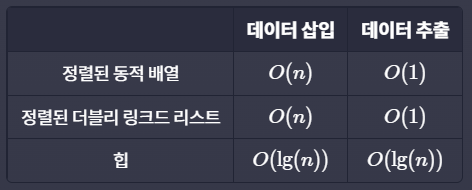




따라서 어떤 연산을 할 때 무엇을 쓰는 것이 가장 효율적인 지 비교해서 사용하면 된다.